In [300]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib
%matplotlib inline
pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns
pd.set_option('display.max_rows', 500) # to display all the columns
np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})


# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


Using matplotlib backend: MacOSX


# In this notebook a sample of the initial df is taken to make the notebook run faster. I think I will switch to PyCharm for the full-size df and training.

# Questions for Nishant:

* I have dealt with categorical columns, they seem to be fine and label encoding works fine. The only as I understand is that the np matrix has to be transpposed after transformation, is that the case?

* I have replaced nan values in numerical columns with the corresponding medians.

* 

In [4]:
df = pd.read_csv('2nd_clean.csv')

In [244]:
sampled_df = df.sample(100000)
sampled_df.drop('Unnamed: 0',axis='columns',inplace=True)

In [245]:
# dividing data into categorical and numerical
categorical_df = sampled_df.select_dtypes(include=['object'])
numerical = sampled_df.select_dtypes(exclude=['object'])

In [246]:
list_of_columns = list(sampled_df.columns)

# Cleaning the categorical data so LabelEncoder() could be used
* working column by column
* the end result has to be transposed in order to be useful

In [247]:
categorical_df.head(2)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
1866926,60 months,C,C4,Software Engineer,10+ years,RENT,Verified,Dec-2014,Fully Paid,n,debt_consolidation,Debt consolidation,GA,Feb-2001,w,Nov-2017,Dec-2017,Individual,N,Cash,N
203433,60 months,C,C2,Director of Construction,3 years,MORTGAGE,Not Verified,Aug-2018,Current,n,debt_consolidation,Debt consolidation,AZ,Sep-2003,w,Feb-2019,Feb-2019,Individual,N,Cash,N


In [248]:
def check_nan_and_categories(df_column):
    """
    Print value_counts and count of nan
    of a categotical feature.
    
    """
    value_counts = df_column.value_counts()
    nans = df_column.isna().value_counts()
    print(value_counts)
    print('*************************')
    print(nans) 

In [249]:
# emp_title
categorical_df.emp_title.fillna('other',inplace=True)

#emp_length
categorical_df.emp_length.fillna('other',inplace=True)

# title
categorical_df.title.fillna('other',inplace=True)

# last_pymnt_d
categorical_df.last_pymnt_d.fillna('other',inplace=True)

# last_credit_pull_d
categorical_df.last_credit_pull_d.fillna('other',inplace=True)

In [250]:
emp_lengthdict = {'10+ years':'ten years or more', 
 '2 years':'two years', 
 '< 1 year':'less than a year', 
 '3 years':'three years', 
 'other':'other', 
 '1 year':'one year',
 '5 years':'five years', 
 '4 years':'four years', 
 '6 years':'six years', 
 '7 years':'seven years', 
 '8 years':'eight years', 
 '9 years':'nine years'}

categorical_df.emp_length.replace(emp_lengthdict,inplace=True)

In [258]:
c_fields = categorical_df.columns
les = [preprocessing.LabelEncoder().fit(categorical_df[field].values) for field in c_fields]
# Transpose cat_transformed before any further procedures
cat_transformed = np.array([le.transform(categorical_df[field]) for field,le in zip(c_fields,les)])

# Working with numerical columns

* #1 thing is to deal with nans
* #2 thing is to deal with outliers

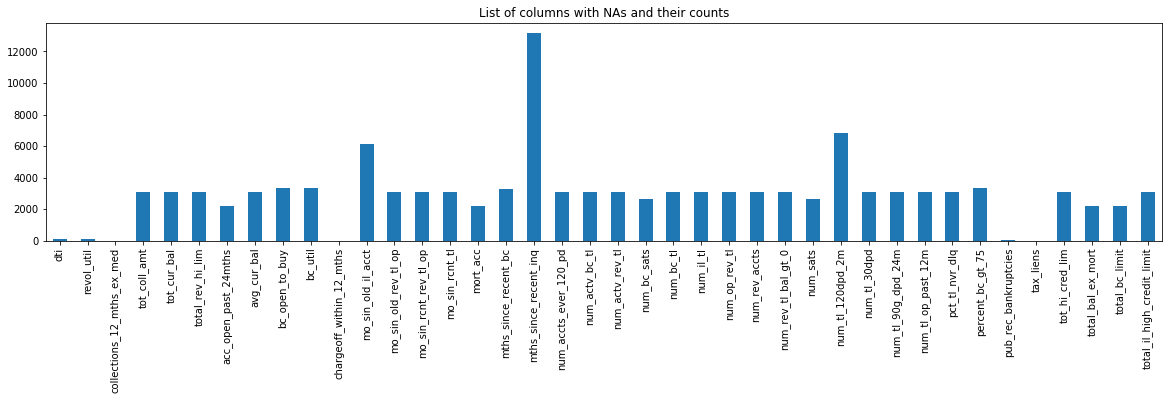

"\nIt's important to reiterate that this df is only sample\nand only has 100k obseravtions\n\n"

In [309]:
NA_col = numerical.isnull().sum()
NA_col = NA_col[NA_col.values >0]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of columns with NAs and their counts')
plt.show()


"""
It's important to reiterate that this df is only a sample
and only has 100k obseravtions.

"""


In [365]:
def impute_numerical_data(num_df):
    """
    impute all nan values in a numerical
    columns with the median of a corresponding
    column.
    
    """
    NA_col = num_df.isnull().sum()
    NA_col = NA_col[NA_col>0].index
    
    for column in num_df[NA_col].columns:
        num_df[column].fillna(num_df[column].median(),inplace=True)

    return num_df

numerical_no_nan = impute_numerical_data(numerical)